<a href="https://colab.research.google.com/github/effection00/ds-section2-sprint2/blob/main/n223a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 2 / NOTE 3*

# 📝 Assignment
---

# Evaluation Metrics for Classification

### 1) Kaggle 챌린지를 이어서 진행합니다.
- **다음 조건에서 F beta score를 구하고 과제 제출폼에 제출하세요.**
    - TP = 4442, TN = 6165, FP = 1515, FN = 1930, 재현율에 정밀도의 2배 가중치를 부여합니다.

In [17]:
tp = 4442
tn = 6165
fp = 1515
fn = 1930

In [18]:
### 이곳에서 과제를 진행해 주세요 ### 
# 혼동행렬

# 실제 참 중 참으로 예측
recall =  tp / (tp + fn)


# 참으로 예측한 것 중 실제 참
precision = tp  / (tp + fp) 


(1+2**2) * precision * recall / ((2**2 * precision) + recall)

# f beta score
0.7063126093178567

0.7063126093178567

### 2) 모델을 학습한 후 Confusion matrix를 그리고 해석하세요
- 임계값을 조정한 후 confusion matrix를 그려보세요
- **(객관식) 임계값을 증가시킬때 positive 범주에 대한 재현율의 변화 양상을 과제 제출폼에 제출하세요.**
    1. 증가
    2. 감소
    3. 변화가 없다


In [19]:
!pip install category_encoders

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
### 이곳에서 과제를 진행해 주세요 ###

import pandas as pd
# target = 'vacc_seas_f'
target = 'vacc_h1n1_f'


train_X  = pd.read_csv('/content/drive/MyDrive/train.csv')
train_y  = pd.read_csv('/content/drive/MyDrive/train_labels.csv')[target]
test_X = pd.read_csv('/content/drive/MyDrive/test.csv')

train_X.select_dtypes(include= 'object')

# ordinal 인코딩
from category_encoders import OrdinalEncoder 
# 대괄호 한개 
encoder = OrdinalEncoder(cols=['opinion_h1n1_vacc_effective','opinion_h1n1_risk','opinion_h1n1_sick_from_vacc','opinion_seas_vacc_effective','opinion_seas_risk','opinion_seas_sick_from_vacc','agegrp'])
train_X = encoder.fit_transform(train_X)
test_X = encoder.transform(test_X)


from category_encoders import OneHotEncoder
encoder = OneHotEncoder(cols=['employment_status',	'census_msa',	'employment_industry','employment_occupation','state'])
train_X = encoder.fit_transform(train_X)
test_X = encoder.transform(test_X)


from sklearn.impute import SimpleImputer

impute = SimpleImputer()
train_X = pd.DataFrame(impute.fit_transform(train_X),columns= train_X.columns)
test_X = pd.DataFrame(impute.transform(test_X),columns= test_X.columns)

from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
train_X = scale.fit_transform(train_X)
test_X = scale.transform(test_X)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, train_size=0.8, random_state = 24)
rf = RandomForestClassifier()
rf.fit(train_X,train_y)
y_pred_proba = rf.predict_proba(val_X)[:,1]
y_pred = rf.predict(val_X)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


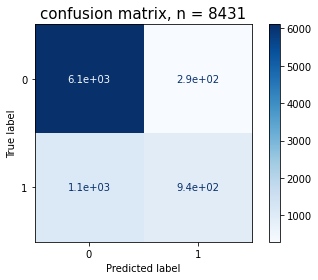

In [22]:
### 이곳에서 과제를 진행해 주세요 ### 
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(rf, val_X, val_y, cmap =plt.cm.Blues, ax=ax);
plt.title(f'confusion matrix, n = {len(val_y)}',fontsize=15)
plt.show()

In [23]:
#confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(val_y , y_pred))

print()
print()

from sklearn.metrics import classification_report
print(classification_report(val_y, y_pred))

# 임계값 0.5일 때,  positive 재현율  0.46

[[6104  293]
 [1092  942]]


              precision    recall  f1-score   support

           0       0.85      0.95      0.90      6397
           1       0.76      0.46      0.58      2034

    accuracy                           0.84      8431
   macro avg       0.81      0.71      0.74      8431
weighted avg       0.83      0.84      0.82      8431



False    6041
True     2390
dtype: int64

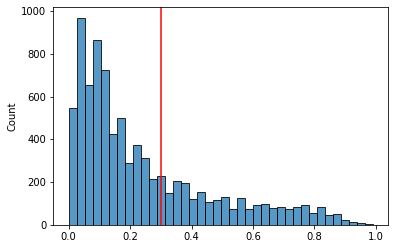

In [24]:
import seaborn as sns
#임계값 0.3
th= 0.3
y_pred = y_pred_proba > th

ax =  sns.histplot(y_pred_proba)
ax.axvline(th, color = 'red')

pd.Series(y_pred).value_counts()

In [25]:
#confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(val_y , y_pred))

print()
print()

from sklearn.metrics import classification_report
print(classification_report(val_y, y_pred))

# 임계값 0.3일 때,  positive 재현율  0.7

[[5408  989]
 [ 633 1401]]


              precision    recall  f1-score   support

           0       0.90      0.85      0.87      6397
           1       0.59      0.69      0.63      2034

    accuracy                           0.81      8431
   macro avg       0.74      0.77      0.75      8431
weighted avg       0.82      0.81      0.81      8431



False    7905
True      526
dtype: int64

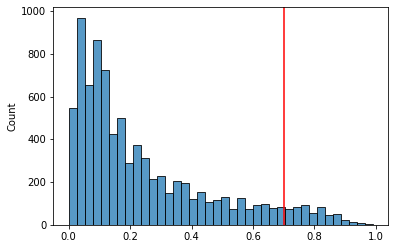

In [26]:
import seaborn as sns
#임계값 0.7
th= 0.7
y_pred = y_pred_proba > th

ax =  sns.histplot(y_pred_proba)
ax.axvline(th, color = 'red')

pd.Series(y_pred).value_counts()

In [27]:
#confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(val_y , y_pred))

print()
print()

from sklearn.metrics import classification_report
print(classification_report(val_y, y_pred))

# 임계값 0.7일 때,  positive 재현율  0.20

[[6319   78]
 [1586  448]]


              precision    recall  f1-score   support

           0       0.80      0.99      0.88      6397
           1       0.85      0.22      0.35      2034

    accuracy                           0.80      8431
   macro avg       0.83      0.60      0.62      8431
weighted avg       0.81      0.80      0.75      8431



False    8394
True       37
dtype: int64

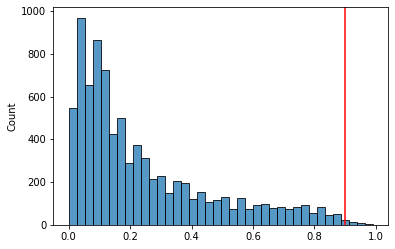

In [28]:
#임계값 0.9
th= 0.9
y_pred = y_pred_proba > th

ax =  sns.histplot(y_pred_proba)
ax.axvline(th, color = 'red')

pd.Series(y_pred).value_counts() 

In [29]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(val_y , y_pred))

from sklearn.metrics import classification_report
print(classification_report(val_y, y_pred))
# 임계값 0.9의 positive 재현율 0.01

[[6392    5]
 [2002   32]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      6397
           1       0.86      0.02      0.03      2034

    accuracy                           0.76      8431
   macro avg       0.81      0.51      0.45      8431
weighted avg       0.79      0.76      0.66      8431



In [30]:
# 임계값을 높일수록 positive의 기준이 엄격해지므로 재현율은 떨어지는 것을 알 수 있다
# 답 -- 2.  감소

### 3) 랜덤포레스트의 n_estimator를 1, 10, 100, 1000으로 바꾸어 가며 positive 범주의 predict_proba를 비교해 보세요
- 파라미터는 다음과 같이 설정합니다.
    - n_jobs=-1, random_state=10, max_depth=None, n_estimators = n
- **(객관식) 확률값들의 분포(종류)의 변화를 과제 제출폼에 제출하세요**
    1. 다양해진다
    2. 변화가없다


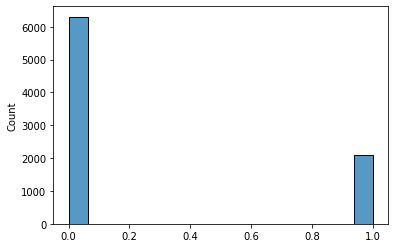

In [31]:
### 이곳에서 과제를 진행해 주세요 ###

# 답 --1. 다양해진다


#나무의 개수 n_estimator 조정 
# n_estimator =1 

rf = RandomForestClassifier(n_jobs=-1, random_state=10, max_depth=None, n_estimators = 1)
rf.fit(train_X,train_y)
y_pred_proba = rf.predict_proba(val_X)[:,1]
sns.histplot(y_pred_proba)

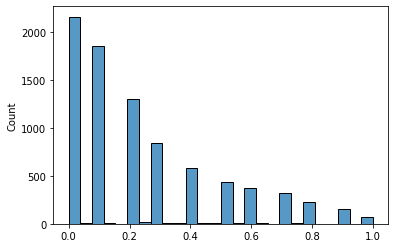

In [32]:
# n_estimator =10

rf = RandomForestClassifier(n_jobs=-1, random_state=10, max_depth=None, n_estimators = 10)
rf.fit(train_X,train_y)
y_pred_proba = rf.predict_proba(val_X)[:,1]
sns.histplot(y_pred_proba)

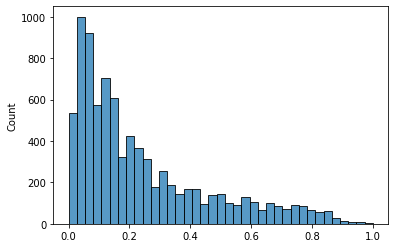

In [33]:
# n_estimator =100 

rf = RandomForestClassifier(n_jobs=-1, random_state=10, max_depth=None, n_estimators = 100)
rf.fit(train_X,train_y)
y_pred_proba = rf.predict_proba(val_X)[:,1]
sns.histplot(y_pred_proba)

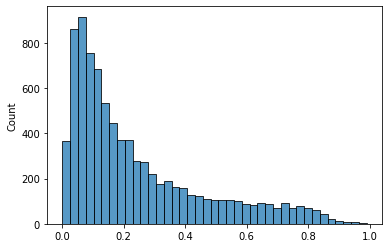

In [34]:
# n_estimator =1000

rf = RandomForestClassifier(n_jobs=-1, random_state=10, max_depth=None, n_estimators = 1000)
rf.fit(train_X,train_y)
y_pred_proba = rf.predict_proba(val_X)[:,1]
sns.histplot(y_pred_proba)

### 4) 두개 이상의 다른 분류 모델을 학습시켜 ROC curve, AUC 점수를 비교하고 설명합니다.
- 더 좋은 결과가 나오는 모델을 사용해서 캐글에 제출하세요
- **캐글 Leaderboard의 본인 Score를 과제 제출폼에 제출하세요.**

0.7030278527499294


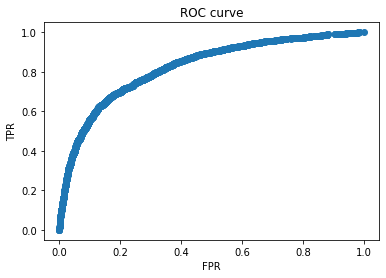

In [54]:
### 이곳에서 과제를 진행해 주세요 ### 

# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import f1_score

lr = LogisticRegression()
lr.fit(train_X,train_y)
pred_y = lr.predict(val_X)
pred_y_proba= lr.predict_proba(val_X)
print(roc_auc_score(val_y,pred_y))

fpr, tpr, thre = roc_curve(val_y,pred_y_proba[:,1])

roc = pd.DataFrame({'FPR' : fpr, 'TPR': tpr})

plt.scatter(fpr, tpr);
plt.title('ROC curve')
plt.xlabel('FPR');
plt.ylabel('TPR');

0.7107497537946822


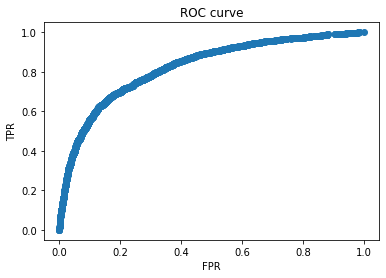

In [56]:
# 랜덤포레스트

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

rf = RandomForestClassifier(n_jobs=-1, random_state=10, max_depth= 30, n_estimators = 250)
rf.fit(train_X,train_y)
pred_y = rf.predict(val_X)
pred_y_proba= lr.predict_proba(val_X)
print(roc_auc_score(val_y,pred_y))

fpr, tpr, thre = roc_curve(val_y,pred_y_proba[:,1])

roc = pd.DataFrame({'FPR' : fpr, 'TPR': tpr})

plt.scatter(fpr, tpr);
plt.title('ROC curve')
plt.xlabel('FPR');
plt.ylabel('TPR');

In [ ]:
# 랜덤 포레스트를 사용하였을 때 roc_auc_score가 더 높아 성능이 더 높다고 판단하여 랜덤포레스트로 fit하여 예측을 진행하였다

In [58]:
final = rf.predict(test_X)

final = pd.DataFrame(final, columns = ['vacc_h1n1_f'])
final.to_csv("third.csv",index_label= 'id')

pd.read_csv("third.csv")

,id,vacc_h1n1_f
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
28099,28099,0
28100,28100,0
28101,28101,0
28102,28102,0


## 🔥 도전과제

### 5) 각 평가지표에 대해 결과를 최대한 분석하고 무엇이 부족한지, 어떤 방향으로 성능을 높여야 하는지 논하세요.

In [38]:
### 이곳에서 과제를 진행해 주세요 ### 